In [1]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [14]:
(x_train,y_train), (x_test,y_test)=keras.datasets.mnist.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

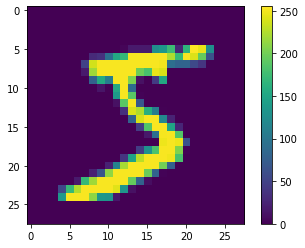

In [19]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [20]:
x_train=x_train/255
x_test=x_test/255

Images have been scaled

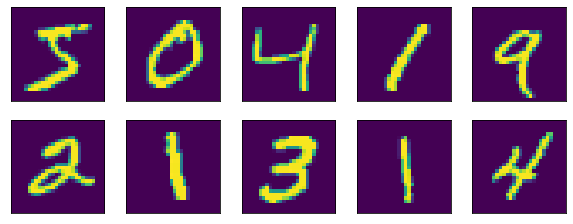

In [21]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

These are the first 10 numbers in the training dataset

In [22]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                       keras.layers.Dense(128, activation='relu'),
                       keras.layers.Dense(10)])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(x_train,y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 178us/sample - loss: 0.2553 - accuracy: 0.9283
Epoch 2/10
60000/60000 [==============================] - 11s 185us/sample - loss: 0.1143 - accuracy: 0.9660
Epoch 3/10
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0790 - accuracy: 0.9759
Epoch 4/10
60000/60000 [==============================] - 17s 281us/sample - loss: 0.0593 - accuracy: 0.9818
Epoch 5/10
60000/60000 [==============================] - 18s 293us/sample - loss: 0.0461 - accuracy: 0.9854
Epoch 6/10
60000/60000 [==============================] - 18s 300us/sample - loss: 0.0361 - accuracy: 0.9888
Epoch 7/10
60000/60000 [==============================] - 17s 290us/sample - loss: 0.0285 - accuracy: 0.9910
Epoch 8/10
60000/60000 [==============================] - 17s 292us/sample - loss: 0.0234 - accuracy: 0.9928
Epoch 9/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0194 - accuracy: 0.9

In [27]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)

10000/10000 - 1s - loss: 0.0910 - accuracy: 0.9764


In [28]:
print("Test accuracy:",test_acc)

Test accuracy: 0.9764


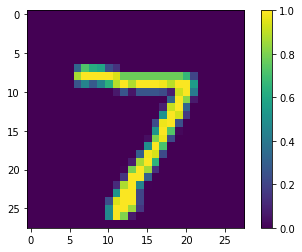

In [36]:
plt.figure()
plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [30]:
probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [31]:
predictions=probability_model.predict(x_test)

In [37]:
np.argmax(predictions[0])

7

In [38]:
class_names=[0,1,2,3,4,5,6,7,8,9]

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [40]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

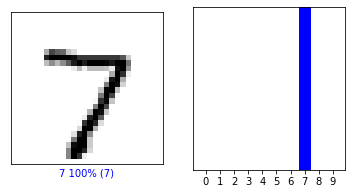

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()